In [1]:
import pandas as pd
from pycaret.time_series import *
import matplotlib.pyplot as plt
from fetch_data import fetch_data

In [2]:
df = fetch_data()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  30 of 30 completed


In [3]:
df.index = pd.to_datetime(df.index)
df = df.sort_index()

In [4]:
df.head()

,AAVE-USD,ADA-USD,ALGO-USD,ATOM-USD,AVAX-USD,BCH-USD,BNB-USD,BTC-USD,CHR-USD,DASH-USD,...,SOL-USD,THETA-USD,TRX-USD,UNI-USD,USDT-USD,VET-USD,WIF-USD,XLM-USD,XMR-USD,XRP-USD
Date,,,,,,,,,,,,,,,,,,,,,
2024-04-10,128.232162,0.586255,0.230523,10.810778,47.311695,629.482422,610.083923,70587.882812,0.394212,36.969437,...,173.437363,3.035096,0.119206,0.000212,1.000117,0.046501,3.624916,0.129653,133.582016,0.617561
2024-04-11,117.844589,0.586191,0.227998,10.755186,46.057598,614.317261,604.893799,70060.609375,0.392901,36.866966,...,172.576370,2.901548,0.120403,0.000210,1.000550,0.048192,3.459283,0.130300,133.369156,0.608880
2024-04-12,100.094933,0.503575,0.194067,9.387263,39.417744,534.766052,596.380127,67195.867188,0.334552,31.887470,...,153.635468,2.439062,0.114880,0.000202,1.000448,0.043033,2.672439,0.115299,122.996651,0.548414
2024-04-13,82.869781,0.447908,0.168352,8.092050,34.078411,481.483765,554.299805,63821.472656,0.326007,28.300234,...,139.341690,1.995765,0.110303,0.000192,1.001213,0.040311,2.345739,0.105686,115.678329,0.480819
2024-04-14,88.107071,0.468911,0.179547,8.361626,37.316444,527.900879,567.218445,65738.726562,0.339479,30.139847,...,151.284943,2.166781,0.112592,0.000197,1.001080,0.042974,3.052224,0.110763,121.533531,0.504258


In [5]:
btc = df.loc[:,'BTC-USD']
btc.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 365 entries, 2024-04-10 to 2025-04-09
Series name: BTC-USD
Non-Null Count  Dtype  
--------------  -----  
365 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


In [8]:
# Set up PyCaret environment
s = setup(data=btc, 
          target = 'BTC-USD',
          #transform_target='log',
          fh=30,  # Forecast horizon
          session_id=123,
          fold_strategy='expanding',
          seasonal_period='D',
          #fold_spans="adaptive",
          numeric_imputation_target = 'drift')

,Description,Value
0,session_id,123
1,Target,BTC-USD
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(365, 1)"
5,Transformed data shape,"(365, 1)"
6,Transformed train set shape,"(335, 1)"
7,Transformed test set shape,"(30, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [ ]:
prophet = create_model('prophet')
#arima = create_model('arima')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,09:15:16
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2024-12-10,4.4807,3.8100,16066.4746,18311.2949,0.1670,0.1506,-23.9712
1,2025-01-09,3.0064,2.4718,10944.1435,11935.4173,0.1104,0.1036,-9.7349
2,2025-02-08,2.7844,2.4728,10340.5430,12065.9806,0.1177,0.1086,-3.3709
Mean,NaT,3.4238,2.9182,12450.3870,14104.2310,0.1317,0.1209,-12.3590
SD,NaT,0.7528,0.6306,2568.8065,2975.3210,0.0251,0.0211,8.6123


In [ ]:
tuned_prophet = tune_model(prophet)
#tuned_arima = tune_model(arima)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2024-12-10,5.1305,4.2863,18396.7611,20600.5923,0.1909,0.1705,-30.6054
1,2025-01-09,0.8810,0.7963,3206.9373,3845.1091,0.0324,0.0320,-0.1141
2,2025-02-08,2.4788,2.2591,9205.5011,11023.1884,0.1052,0.0975,-2.6480
Mean,NaT,2.8301,2.4472,10269.7332,11822.9632,0.1095,0.1000,-11.1225
SD,NaT,1.7526,1.4310,6246.7127,6863.7349,0.0648,0.0566,13.8152


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    7.1s finished


In [13]:
print(tuned_prophet)

ProphetPeriodPatched(changepoint_prior_scale=0.19615118354865432,
                     holidays_prior_scale=1.4906166728108328,
                     seasonality_prior_scale=0.11835503996887899)


In [14]:
# Predictions
final_prophet = finalize_model(tuned_prophet)
#future_dates = pd.date_range(df.index[-1], periods=30, freq='D')
prophet_predictions = predict_model(final_prophet)
#arima_predictions = predict_model(tuned_arima, fh=30)

In [15]:
#Plot prophet model forecast
plot_model(final_prophet, plot='forecast')



Function for forecasting BTC with FB Prophet

In [20]:
def get_btc_prophet(data):
    try:
      #create series with just BTC close price
      btc = data.loc[:,'BTC-USD']
      # Set up PyCaret environment
      s = setup(data=btc, 
            target = 'BTC-USD',
            #transform_target='log',
            fh=30,  # Forecast horizon
            session_id=123,
            fold_strategy='expanding',
            seasonal_period='D',
            #fold_spans="adaptive",
            numeric_imputation_target = 'drift')
      prophet = create_model('prophet')
      tuned_prophet = tune_model(prophet)
      # Predictions
      final_prophet = finalize_model(tuned_prophet)
      prophet_predictions = predict_model(final_prophet)
      #Plot prophet model forecast
      plot_model(final_prophet, plot='forecast')
      return prophet, plt.gcf()
    except Exception as e:
       print(f"An error occurred: {e}")
       return None, None

In [21]:
if __name__ == "__main__":
    data = fetch_data()
    trained_model, plot = get_btc_prophet(data)
    plt.show()
    if trained_model is not None and plot is not None:
        save_model(trained_model, 'trained_model')
        plt.show()
    else:
        print("Model training or plotting failed")

[*********************100%***********************]  30 of 30 completed


,Description,Value
0,session_id,123
1,Target,BTC-USD
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(365, 1)"
5,Transformed data shape,"(365, 1)"
6,Transformed train set shape,"(335, 1)"
7,Transformed test set shape,"(30, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2024-12-10,4.4807,3.8100,16066.4746,18311.2949,0.1670,0.1506,-23.9712
1,2025-01-09,3.0064,2.4718,10944.1435,11935.4173,0.1104,0.1036,-9.7349
2,2025-02-08,2.7844,2.4728,10340.5430,12065.9806,0.1177,0.1086,-3.3709
Mean,NaT,3.4238,2.9182,12450.3870,14104.2310,0.1317,0.1209,-12.3590
SD,NaT,0.7528,0.6306,2568.8065,2975.3210,0.0251,0.0211,8.6123


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2024-12-10,5.1305,4.2863,18396.7611,20600.5923,0.1909,0.1705,-30.6054
1,2025-01-09,0.8810,0.7963,3206.9373,3845.1091,0.0324,0.0320,-0.1141
2,2025-02-08,2.4788,2.2591,9205.5011,11023.1884,0.1052,0.0975,-2.6480
Mean,NaT,2.8301,2.4472,10269.7332,11822.9632,0.1095,0.1000,-11.1225
SD,NaT,1.7526,1.4310,6246.7127,6863.7349,0.0648,0.0566,13.8152


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   14.9s finished


<Figure size 800x550 with 0 Axes>

Transformation Pipeline and Model Successfully Saved


In [88]:
arima = create_model('arima')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2024-12-09,1.3333,1.1959,4806.9143,5762.3896,0.0496,0.0483,-1.6626
1,2025-01-08,1.0532,0.8966,3837.7182,4332.6144,0.0383,0.0384,-0.2665
2,2025-02-07,1.3397,1.3018,4980.6148,6356.8002,0.0566,0.0543,-0.4456
Mean,NaT,1.2421,1.1314,4541.7491,5483.9347,0.0482,0.0470,-0.7916
SD,NaT,0.1336,0.1716,502.8503,849.5037,0.0075,0.0065,0.6203


In [89]:
tuned_arima = tune_model(arima)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2024-12-09,0.7755,0.7433,2795.7505,3581.4082,0.0281,0.0284,-0.0285
1,2025-01-08,1.5058,1.3368,5486.6403,6459.5071,0.0535,0.0555,-1.8151
2,2025-02-07,1.2567,1.3890,4671.8353,6782.8181,0.0539,0.0510,-0.6458
Mean,NaT,1.1793,1.1564,4318.0754,5607.9111,0.0452,0.0450,-0.8298
SD,NaT,0.3031,0.2929,1126.6711,1439.0200,0.0121,0.0119,0.7409


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   19.2s finished


In [90]:
final_arima = finalize_model(tuned_arima)
#future_dates = pd.date_range(df.index[-1], periods=30, freq='D')
arima_predictions = predict_model(final_arima)

In [91]:
#Plot prophet model forecast
plot_model(final_arima, plot='forecast')

In [25]:
bnb = df.loc[:,'BNB-USD']
# Set up PyCaret environment
s = setup(data=bnb, 
          target = 'BNB-USD',
          transform_target='log',
          fh=30,  # Forecast horizon
          session_id=123,
          fold_strategy='expanding',
          seasonal_period='D',
          #fold_spans="adaptive",
          numeric_imputation_target = 'drift')

,Description,Value
0,session_id,123
1,Target,BNB-USD
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(365, 1)"
5,Transformed data shape,"(365, 1)"
6,Transformed train set shape,"(335, 1)"
7,Transformed test set shape,"(30, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [26]:
arima = create_model('arima')
tuned_arima = tune_model(arima)
final_arima = finalize_model(tuned_arima)
#future_dates = pd.date_range(df.index[-1], periods=30, freq='D')
arima_predictions = predict_model(final_arima)
#Plot prophet model forecast
plot_model(final_arima, plot='forecast')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2024-12-10,0.8786,0.8008,29.6993,34.9335,0.0425,0.0433,-2.5429
1,2025-01-09,1.1718,1.2937,38.4436,54.7535,0.0620,0.0583,-0.5297
2,2025-02-08,1.9592,1.7316,64.1817,73.5128,0.1003,0.1070,-2.6965
Mean,NaT,1.3365,1.2754,44.1082,54.3999,0.0683,0.0695,-1.9230
SD,NaT,0.4563,0.3802,14.6362,15.7519,0.0240,0.0272,0.9872


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2024-12-10,0.8389,0.7173,28.3575,31.2927,0.0401,0.0410,-1.8429
1,2025-01-09,0.9410,1.1109,30.8696,47.0150,0.0501,0.0475,-0.1279
2,2025-02-08,0.9802,0.9408,32.1100,39.9407,0.0507,0.0516,-0.0912
Mean,NaT,0.9200,0.9230,30.4457,39.4161,0.0470,0.0467,-0.6873
SD,NaT,0.0596,0.1612,1.5610,6.4293,0.0049,0.0044,0.8173


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    8.3s finished


In [18]:
prophet = create_model('prophet')
tuned_prophet = tune_model(prophet)
# Predictions
final_prophet = finalize_model(tuned_prophet)
prophet_predictions = predict_model(final_prophet)
#Plot prophet model forecast
plot_model(final_prophet, plot='forecast')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2024-12-10,1.1591,1.0075,39.1829,43.9486,0.0565,0.0546,-4.6074
1,2025-01-09,3.1309,2.8251,102.7136,119.5633,0.1617,0.1450,-6.2942
2,2025-02-08,0.8234,0.7494,26.9752,31.8123,0.0440,0.0435,0.3078
Mean,NaT,1.7045,1.5273,56.2906,65.1081,0.0874,0.0810,-3.5313
SD,NaT,1.0179,0.9237,33.2022,38.8231,0.0528,0.0455,2.8006


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2024-12-10,0.7515,0.6600,25.4044,28.7926,0.0366,0.0361,-1.4068
1,2025-01-09,2.8803,2.6428,94.4923,111.8478,0.1491,0.1344,-5.3832
2,2025-02-08,1.1099,1.0964,36.3604,46.5447,0.0612,0.0583,-0.4818
Mean,NaT,1.5806,1.4664,52.0857,62.3950,0.0823,0.0762,-2.4239
SD,NaT,0.9306,0.8507,30.3178,35.7115,0.0483,0.0421,2.1263


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    5.0s finished


In [28]:
df.head()

,AAVE-USD,ADA-USD,ALGO-USD,ATOM-USD,AVAX-USD,BCH-USD,BNB-USD,BTC-USD,CHR-USD,DASH-USD,...,SOL-USD,THETA-USD,TRX-USD,UNI-USD,USDT-USD,VET-USD,WIF-USD,XLM-USD,XMR-USD,XRP-USD
Date,,,,,,,,,,,,,,,,,,,,,
2024-04-10,128.232162,0.586255,0.230523,10.810778,47.311695,629.482422,610.083923,70587.882812,0.394212,36.969437,...,173.437363,3.035096,0.119206,0.000212,1.000117,0.046501,3.624916,0.129653,133.582016,0.617561
2024-04-11,117.844589,0.586191,0.227998,10.755186,46.057598,614.317261,604.893799,70060.609375,0.392901,36.866966,...,172.576370,2.901548,0.120403,0.000210,1.000550,0.048192,3.459283,0.130300,133.369156,0.608880
2024-04-12,100.094933,0.503575,0.194067,9.387263,39.417744,534.766052,596.380127,67195.867188,0.334552,31.887470,...,153.635468,2.439062,0.114880,0.000202,1.000448,0.043033,2.672439,0.115299,122.996651,0.548414
2024-04-13,82.869781,0.447908,0.168352,8.092050,34.078411,481.483765,554.299805,63821.472656,0.326007,28.300234,...,139.341690,1.995765,0.110303,0.000192,1.001213,0.040311,2.345739,0.105686,115.678329,0.480819
2024-04-14,88.107071,0.468911,0.179547,8.361626,37.316444,527.900879,567.218445,65738.726562,0.339479,30.139847,...,151.284943,2.166781,0.112592,0.000197,1.001080,0.042974,3.052224,0.110763,121.533531,0.504258


In [30]:
wif = df.loc[:,'WIF-USD']

In [32]:
wif = df.loc[:,'WIF-USD']
# Set up PyCaret environment
s = setup(data=wif, 
          target = 'WIF-USD',
          transform_target='log',
          fh=30,  # Forecast horizon
          session_id=123,
          fold_strategy='expanding',
          seasonal_period='D',
          #fold_spans="adaptive",
          numeric_imputation_target = 'drift')
arima = create_model('arima')
prophet = create_model('prophet')
tuned_arima = tune_model(arima)
tuned_prophet = tune_model(prophet)
final_arima = finalize_model(tuned_arima)
final_prophet = finalize_model(tuned_prophet)
#future_dates = pd.date_range(df.index[-1], periods=30, freq='D')
arima_predictions = predict_model(final_arima)
prophet_predictions = predict_model(final_prophet)
#Plot prophet model forecast
plot_model(final_arima, plot='forecast')
#Plot prophet model forecast
plot_model(final_prophet, plot='forecast')

,Description,Value
0,session_id,123
1,Target,WIF-USD
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(365, 1)"
5,Transformed data shape,"(365, 1)"
6,Transformed train set shape,"(335, 1)"
7,Transformed test set shape,"(30, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2024-12-10,2.2337,1.9420,0.8146,0.9188,0.4126,0.3255,-3.8661
1,2025-01-09,0.8660,0.7946,0.3210,0.3803,0.3197,0.2542,-0.2432
2,2025-02-08,0.2000,0.1905,0.0732,0.0892,0.1172,0.1260,-0.5980
Mean,NaT,1.0999,0.9757,0.4029,0.4628,0.2832,0.2353,-1.5691
SD,NaT,0.8466,0.7264,0.3082,0.3437,0.1233,0.0825,1.6306


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2024-12-10,4.8083,3.9392,1.7535,1.8637,0.8853,0.5830,-19.0209
1,2025-01-09,4.1601,3.3259,1.5422,1.5919,1.4215,0.7726,-20.7830
2,2025-02-08,0.7292,0.6023,0.2669,0.2820,0.4463,0.3579,-14.9693
Mean,NaT,3.2326,2.6225,1.1875,1.2459,0.9177,0.5712,-18.2578
SD,NaT,1.7898,1.4503,0.6567,0.6905,0.3988,0.1695,2.4340


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2024-12-10,1.5181,1.3203,0.5536,0.6247,0.2866,0.2409,-1.2493
1,2025-01-09,0.8264,0.8123,0.3063,0.3888,0.3196,0.2468,-0.2992
2,2025-02-08,0.3337,0.3019,0.1221,0.1413,0.2186,0.1883,-3.0110
Mean,NaT,0.8927,0.8115,0.3274,0.3849,0.2749,0.2253,-1.5198
SD,NaT,0.4858,0.4158,0.1768,0.1973,0.0421,0.0263,1.1235


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   11.9s finished


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2024-12-10,0.8238,0.8969,0.3004,0.4243,0.1254,0.1338,-0.0379
1,2025-01-09,1.9430,1.6497,0.7203,0.7896,0.6997,0.4697,-4.3593
2,2025-02-08,3.0337,2.3750,1.1101,1.1120,1.8621,0.9564,-247.3137
Mean,NaT,1.9335,1.6405,0.7103,0.7753,0.8957,0.5200,-83.9036
SD,NaT,0.9022,0.6035,0.3306,0.2809,0.7224,0.3377,115.5618


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    9.4s finished


ETH Forecast with ARIMA and Prophet

In [34]:
eth = df.loc[:,'ETH-USD']
# Set up PyCaret environment
s = setup(data=eth, 
          target = 'ETH-USD',
          #transform_target='log',
          fh=30,  # Forecast horizon
          session_id=123,
          fold_strategy='expanding',
          seasonal_period='D',
          #fold_spans="adaptive",
          numeric_imputation_target = 'drift')
arima = create_model('arima')
prophet = create_model('prophet')
tuned_arima = tune_model(arima)
tuned_prophet = tune_model(prophet)
final_arima = finalize_model(tuned_arima)
final_prophet = finalize_model(tuned_prophet)
#future_dates = pd.date_range(df.index[-1], periods=30, freq='D')
arima_predictions = predict_model(final_arima)
prophet_predictions = predict_model(final_prophet)
#Plot prophet model forecast
plot_model(final_arima, plot='forecast')
#Plot prophet model forecast
plot_model(final_prophet, plot='forecast')

,Description,Value
0,session_id,123
1,Target,ETH-USD
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(365, 1)"
5,Transformed data shape,"(365, 1)"
6,Transformed train set shape,"(335, 1)"
7,Transformed test set shape,"(30, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2024-12-10,1.6578,1.4095,340.6291,395.1125,0.0992,0.0932,-1.9618
1,2025-01-09,1.1915,1.1007,246.7682,308.5468,0.0830,0.0782,-0.6804
2,2025-02-08,1.0155,0.8679,212.3224,243.9238,0.0846,0.0871,0.1446
Mean,NaT,1.2883,1.1260,266.5732,315.8611,0.0890,0.0862,-0.8325
SD,NaT,0.2710,0.2218,54.2207,61.9388,0.0073,0.0062,0.8666


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2024-12-10,2.8949,2.4381,594.7950,683.4772,0.1739,0.1560,-7.8625
1,2025-01-09,4.2545,3.3666,881.1595,943.6853,0.2910,0.2479,-14.7194
2,2025-02-08,2.2729,1.8426,475.2470,517.8766,0.2043,0.1807,-2.8559
Mean,NaT,3.1408,2.5491,650.4005,715.0130,0.2231,0.1949,-8.4793
SD,NaT,0.8275,0.6271,170.3139,175.2600,0.0496,0.0388,4.8628


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2024-12-10,0.8320,0.7893,170.9490,221.2596,0.0464,0.0481,0.0712
1,2025-01-09,0.7678,0.7038,159.0162,197.2701,0.0530,0.0519,0.3131
2,2025-02-08,1.2055,1.2246,252.0635,344.1854,0.1140,0.1026,-0.7032
Mean,NaT,0.9351,0.9059,194.0096,254.2383,0.0712,0.0675,-0.1063
SD,NaT,0.1930,0.2281,41.3384,64.3518,0.0304,0.0249,0.4335


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    6.2s finished


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2024-12-10,3.8671,2.9385,794.5578,823.7455,0.2214,0.2504,-11.8735
1,2025-01-09,1.7645,1.4492,365.4520,406.2108,0.1128,0.1207,-1.9126
2,2025-02-08,1.0814,1.1061,226.1159,310.8598,0.1025,0.0930,-0.3893
Mean,NaT,2.2377,1.8312,462.0419,513.6054,0.1455,0.1547,-4.7251
SD,NaT,1.1854,0.7954,241.9074,222.7302,0.0538,0.0686,5.0927


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    6.5s finished


Forecast BTC-USD using LSTM

In [4]:
import pandas as pd
from neuralforecast import NeuralForecast
from neuralforecast.models import LSTM
from neuralforecast.losses.pytorch import MAE
import matplotlib.pyplot as plt

In [5]:
# 1. Standardize columns
df['ds'] = pd.to_datetime(df.index)  # Convert to datetime
df['y'] = df['BTC-USD']                # Target variable


In [6]:
# Add constant unique_id (since you only have BTC-USD)
df['unique_id'] = 'BTC-USD'  # <- THIS FIXES THE ERROR


In [7]:
# 2. Configure LSTM model
lstm_model = LSTM(
    h=30,                          # Forecast horizon (30 days)
    input_size=60,                 # Lookback window (60 days)
    max_steps=500,                 # Training iterations
    #hidden_size=64,                # LSTM hidden units
    loss=MAE(),                    # Loss function
    scaler_type='standard'         # Normalize data
)

Seed set to 1


In [8]:
# 3. Train and predict
nf = NeuralForecast(models=[lstm_model], freq='D')
nf.fit(df=df)
forecast = nf.predict()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | hist_encoder | LSTM          | 199 K  | train
4 | mlp_decoder  | MLP           | 16.6 K | train
-------------------------------------------------------
215 K     Trainable params
0         Non-trainable params
215 K     Total params
0.863     Total estimated model params size (MB)
10        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=500` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

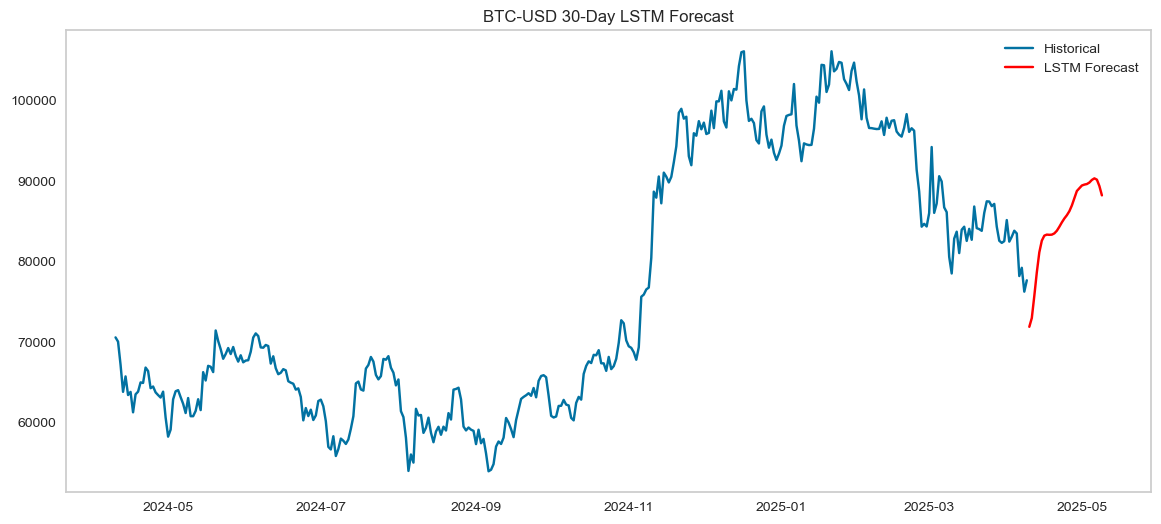

In [9]:
# 4. Plot results
plt.figure(figsize=(14, 6))
plt.plot(df['ds'], df['y'], label='Historical')
plt.plot(forecast['ds'], forecast['LSTM'], label='LSTM Forecast', color='red')
plt.title('BTC-USD 30-Day LSTM Forecast')
plt.legend()
plt.grid()
plt.show()

In [ ]:
#Add signal column and populate with argument to buy or sell if price exceeds or gets below $2000
df['signal'] = 0  # 0 = hold, 1 = buy, -1 = sell

for i in range(1, len(df)):
    if df['y'].iloc[i] > df['y'].iloc[i-1] + 2000:
        df['signal'].iloc[i] = 1
    elif df['y'].iloc[i] < df['y'].iloc[i-1] - 2000:
        df['signal'].iloc[i] = -1

In [22]:
import plotly.graph_objects as go

In [53]:
fig = go.Figure()

# Add historical data trace
fig.add_trace(go.Scatter(
    x=df['ds'],
    y=df['y'],
    mode='lines',
    name='Historical BTC Price'
))
fig.add_trace(go.Scatter(
    x=forecast['ds'], 
    y = forecast['LSTM'], 
    name ='LSTM Forecast'
))
# Add Buy Signal Markers
buy_signals = df[df['signal'] == 1]
fig.add_trace(go.Scatter(
    x=buy_signals['ds'],
    y=buy_signals['y'],
    mode='markers',
    marker=dict(symbol='circle', size=6, color='green'),
    name='Buy Signal'
))

# Add Sell Signal Markers
sell_signals = df[df['signal'] == -1]
fig.add_trace(go.Scatter(
    x=sell_signals['ds'],
    y=sell_signals['y'],
    mode='markers',
    marker=dict(symbol='circle', size=6, color='red'),
    name='Sell Signal'
))
# Customize the layout
fig.update_layout(
    title='BTC-USD Price Forecast with LSTM',
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    template='plotly_white'  # Optional: Use a clean template

)
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=7, label="1w", step="day", stepmode="backward"),
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(step="all")
        ])
    )
)
# Show the plot
fig.show()